# Практика проверки гипотез

In [2]:
import numpy as np
from scipy import stats

## Вопрос 1

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

https://en.wikipedia.org/wiki/Binomial_test

`scipy.stats.binom_test - Perform a test that the probability of success is p.`

In [6]:
print(np.round(stats.binom_test(67, 100, 0.75, alternative='two-sided'), 4))

0.0822


## Вопрос 2

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

[x] Эта сеть менее популярна, поэтому в её ресторанах меньше поток посетителей; отсюда меньший уровень стресса у работников

[] Сотрудники чрезмерно оптимистично отвечали на вопрос, потому что опрос не был анонимным

[] Сеть известна низкими зарплатами и большой текучкой кадров, поэтому туда идут работать люди, не склонные переживать о сохранении рабочего места

[x] Условия работы в этой сети лучше, чем в среднем

## Вопрос 3

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.binned_statistic_2d.html

In [23]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [16]:
data = pd.read_csv('pines.txt.gz', delimiter='\t')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


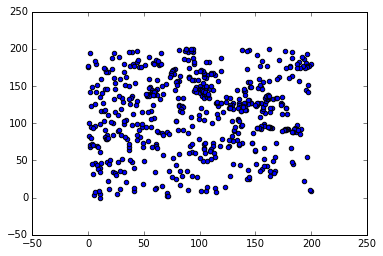

In [29]:
plt.scatter(data.sn, data.we)

In [46]:
statistics = stats.binned_statistic_2d(data.sn, data.we, None, statistic='count', bins=5).statistic
statistics

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

<Container object of 25 artists>

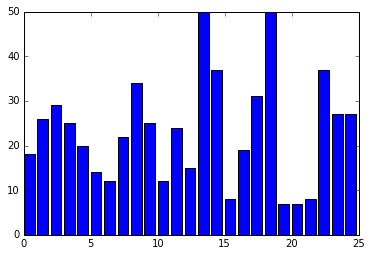

In [52]:
plt.bar(range(25), [i for l in statistics for i in l])

In [44]:
print(np.round(statistics.mean(), 2))

23.36


## Вопрос 4

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [61]:
exp_normal = [statistics.mean()] * 25
chi = stats.chisquare([i for l in statistics for i in l], exp_normal, ddof=0)
print(chi)
print(np.round(chi.statistic, 2))

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)
150.59


## Вопрос 5
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K−1, где K — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

> Отвергается